# Margin around the face

In [22]:
%reload_ext autoreload
%autoreload 2

In [57]:
from IPython.display import HTML
import itertools
from fastai.core import *
from fastai.vision import *
from facenet_pytorch import MTCNN
from kgl_deepfake.nb_00 import *
from kgl_deepfake.nb_01b import *

### Data

In [24]:
SOURCE = Path('../data/train_sample_videos/')

In [25]:
f = get_files(SOURCE, extensions=['.json'])[0]
annots = pd.read_json(f).T
annots.reset_index(inplace=True)
annots.rename({'index':'fname'}, axis=1, inplace=True)
annots.head()

,fname,label,split,original
0,aagfhgtpmv.mp4,FAKE,train,vudstovrck.mp4
1,aapnvogymq.mp4,FAKE,train,jdubbvfswz.mp4
2,abarnvbtwb.mp4,REAL,train,None
3,abofeumbvv.mp4,FAKE,train,atvmxvwyns.mp4
4,abqwwspghj.mp4,FAKE,train,qzimuostzz.mp4


In [73]:
fn = SOURCE/annots.fname[315]
fn

PosixPath('../data/train_sample_videos/dtocdfbwca.mp4')

### No margin

In [74]:
device = 'cuda:0' if torch.cuda.is_available() else 'cpu'

In [75]:
detector = MTCNN(device=device, post_process=False, select_largest=False)

In [76]:
face = get_first_face(detector, fn)

0

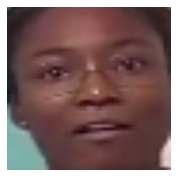

In [77]:
show_image(face[1].type(torch.uint8)); face[0]

### Margin > 0

To change the amount of margin around the face, use the `margin` keyword for `MTCNN`.

In [78]:
detector = MTCNN(device=device, margin=50, post_process=False, select_largest=False)


In [79]:
face = get_first_face(detector, fn)

0

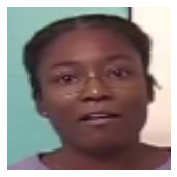

In [80]:
show_image(face[1].type(torch.uint8)); face[0]

### Comparison

In [81]:
margins = [0, 10, 15, 20,25, 30, 40, 50]

In [82]:
faces = []
for margin in margins:
    detector = MTCNN(device=device, margin=margin, post_process=False, select_largest=False)
    face = get_first_face(detector, fn)
    faces.append(face[1])

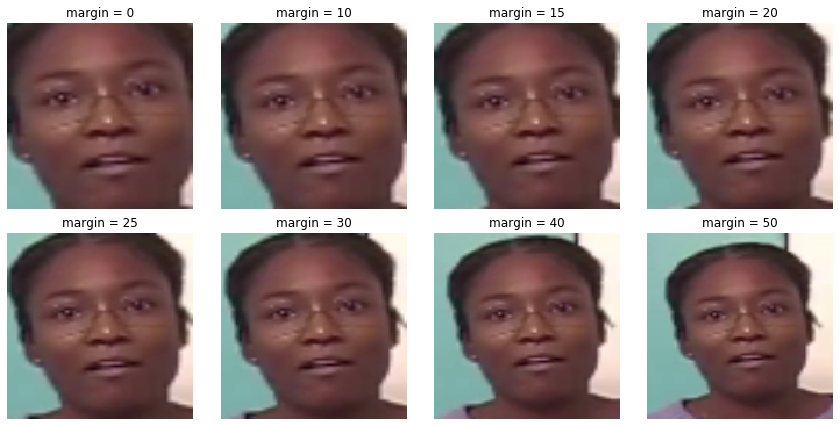

In [83]:
_, axs = plt.subplots(nrows=2, ncols=4, figsize=(12, 6))
axs = axs.flatten()
for ax, margin, face in itertools.zip_longest(axs, margins, faces):
    if margin is not None:
        show_image(face.type(torch.uint8), ax=ax)
        ax.set_title(f'margin = {margin}')
    ax.axis('off')
plt.tight_layout()

# - fin